In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from perceptron_classification import Perceptron
from tqdm import tqdm


## Fit an object oriented perceptron algorithm on the surgical dataset for classification

In [3]:
df= pd.read_csv("Input\Surgical-deepnet.csv")
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [4]:
X=df.drop("complication",axis=1).copy().values
Y=df['complication'].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
X_train.shape , Y_train.shape, X_test.shape, Y_test.shape


((11708, 24), (11708,), (2927, 24), (2927,))

In [ ]:
perceptron= Perceptron(24,0.001)
perceptron.fit(X_train,Y_train)

## Plot accuracy in each epoch for train and test data

In [5]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(24,0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x_train,'sigmoid')
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,'sigmoid')
    losstest,acctest=per.evaluate( X_test, Y_test,'sigmoid')
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)


100%|██████████| 40/40 [01:44<00:00,  2.62s/it]


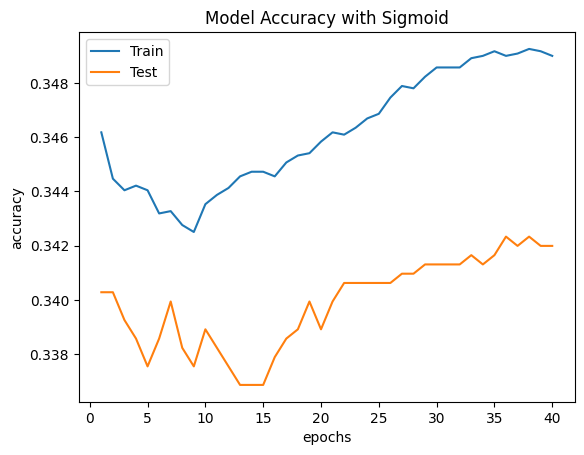

In [6]:
plt.plot(list(range(1,epochs+1)),acc_train,label="Train")
plt.plot(list(range(1,epochs+1)),acc_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Model Accuracy with Sigmoid")
plt.legend()
plt.show()

## Plot Loss in Each epoch for train and test data

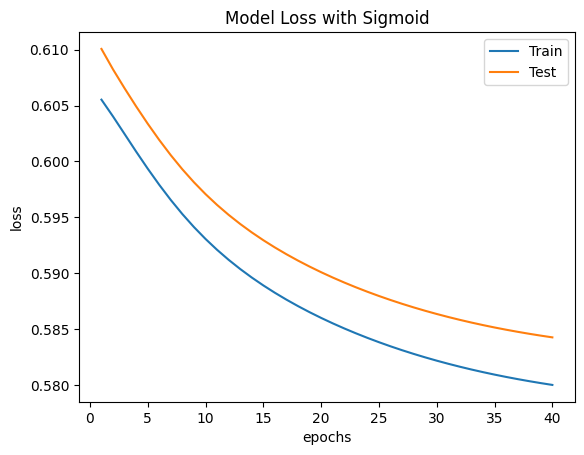

In [7]:
plt.plot(list(range(1,epochs+1)),loss_train,label="Train")
plt.plot(list(range(1,epochs+1)),loss_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Model Loss with Sigmoid")
plt.legend()
plt.show()

## Calculate Confusion Matrix

Text(0.5, 1.0, 'Confusion Matric with Sigmoid')

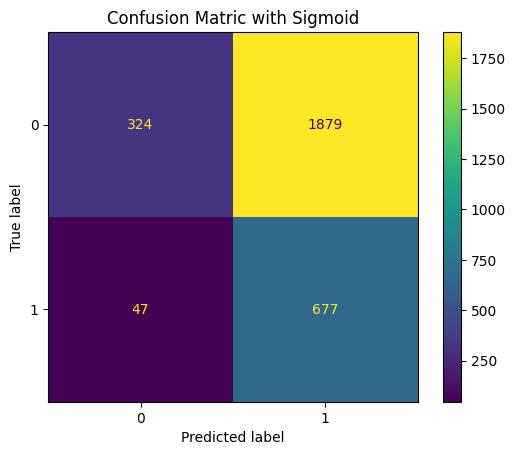

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,'sigmoid')
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('Confusion Matric with Sigmoid')

## Repeat the above steps with 5 different activation functions, e.g. sigmoid, tanh, relu, linear,...

## relu

In [10]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(24,0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="relu")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"relu")
    losstest,acctest=per.evaluate( X_test, Y_test,"relu")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

100%|██████████| 40/40 [01:29<00:00,  2.24s/it]


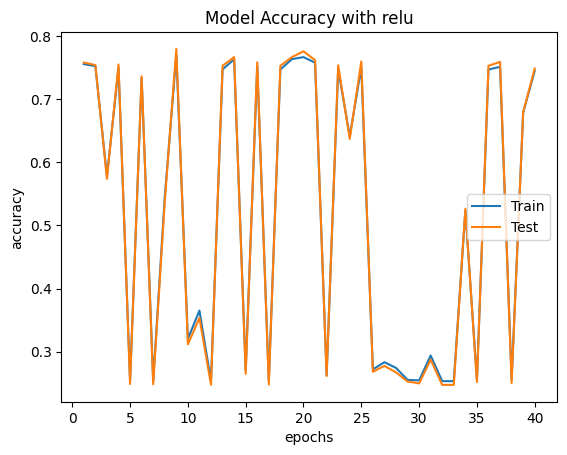

In [14]:
plt.plot(list(range(1,epochs+1)),acc_train,label="Train")
plt.plot(list(range(1,epochs+1)),acc_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Model Accuracy with relu")
plt.legend()
plt.show()

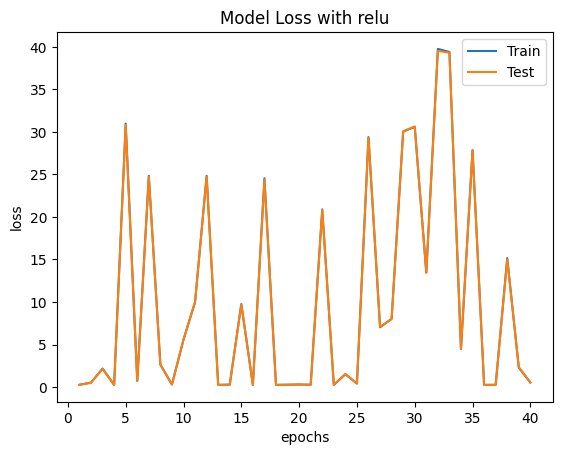

In [15]:
plt.plot(list(range(1,epochs+1)),loss_train,label="Train")
plt.plot(list(range(1,epochs+1)),loss_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Model Loss with relu")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matric with relu')

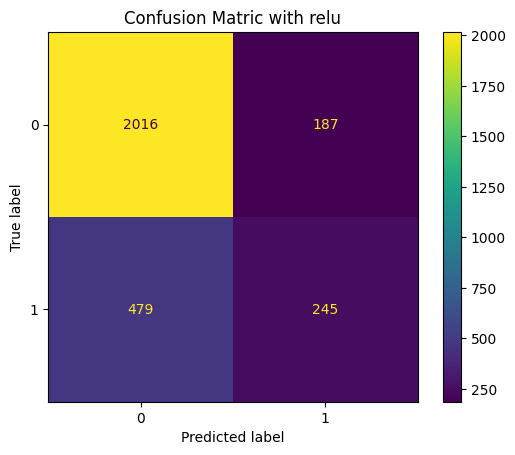

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"relu")
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('Confusion Matric with relu')

## tanh

In [21]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(24,0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="tanh")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"tanh")
    losstest,acctest=per.evaluate( X_test, Y_test,"tanh")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

100%|██████████| 40/40 [01:54<00:00,  2.87s/it]


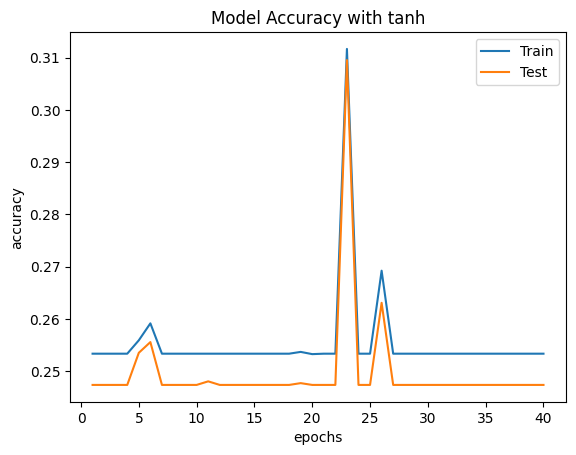

In [22]:
plt.plot(list(range(1,epochs+1)),acc_train,label="Train")
plt.plot(list(range(1,epochs+1)),acc_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Model Accuracy with tanh")
plt.legend()
plt.show()

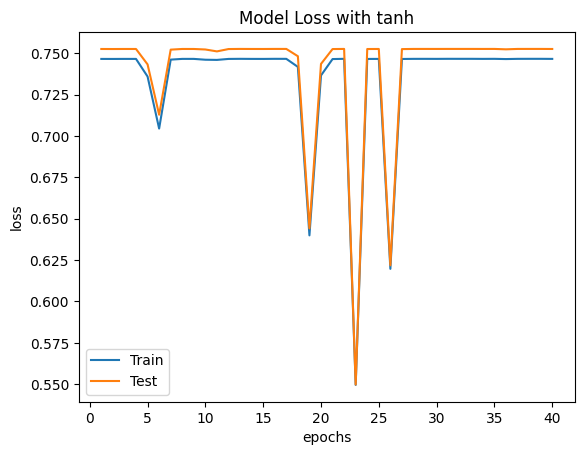

In [23]:
plt.plot(list(range(1,epochs+1)),loss_train,label="Train")
plt.plot(list(range(1,epochs+1)),loss_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Model Loss with tanh")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matric with tanh')

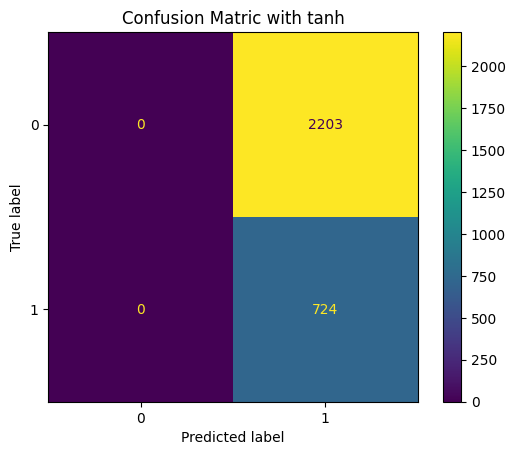

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"tanh")
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('Confusion Matric with tanh')

## unitstep

In [32]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(24,0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="unitstep")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"unitstep")
    losstest,acctest=per.evaluate( X_test, Y_test,"unitstep")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

100%|██████████| 40/40 [00:20<00:00,  1.98it/s]


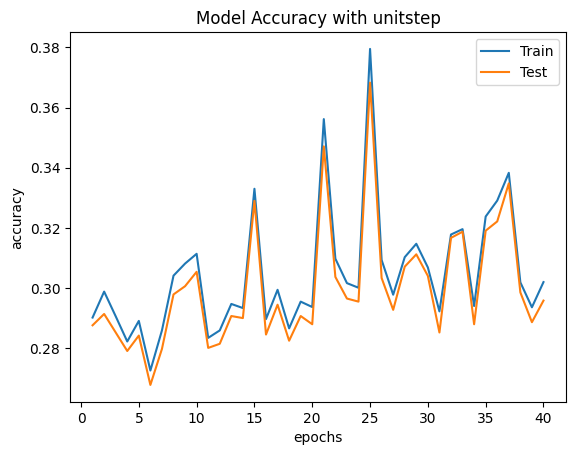

In [33]:
plt.plot(list(range(1,epochs+1)),acc_train,label="Train")
plt.plot(list(range(1,epochs+1)),acc_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Model Accuracy with unitstep")
plt.legend()
plt.show()

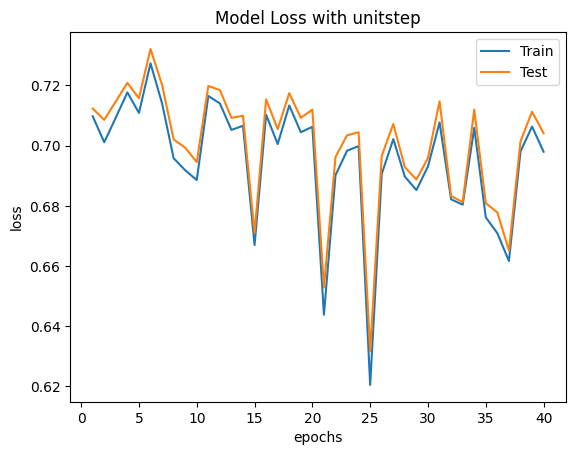

In [34]:
plt.plot(list(range(1,epochs+1)),loss_train,label="Train")
plt.plot(list(range(1,epochs+1)),loss_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Model Loss with unitstep")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Confusion Matric with unitstep')

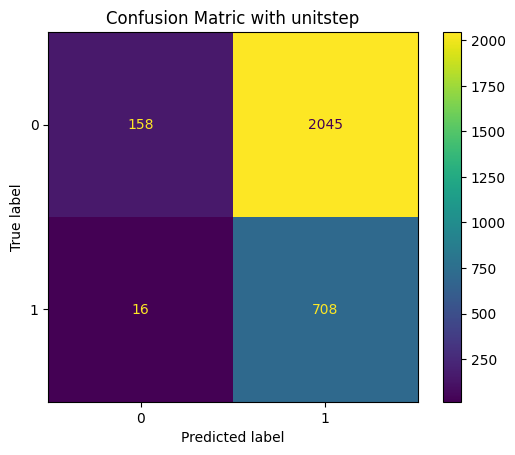

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"unitstep")
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('Confusion Matric with unitstep')

## sign

In [41]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(24,0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="sign")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"sign")
    losstest,acctest=per.evaluate( X_test, Y_test,"sign")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

100%|██████████| 40/40 [00:20<00:00,  1.97it/s]


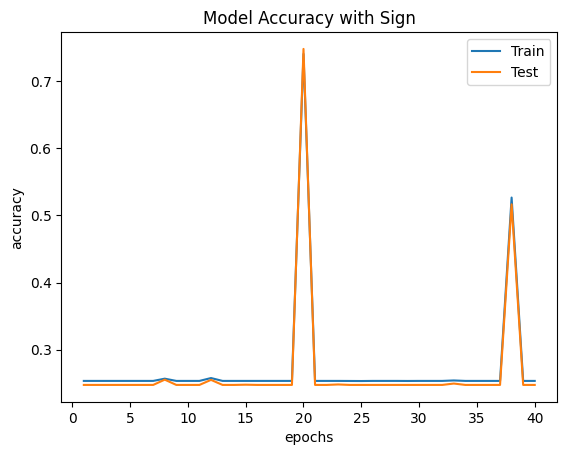

In [42]:
plt.plot(list(range(1,epochs+1)),acc_train,label="Train")
plt.plot(list(range(1,epochs+1)),acc_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Model Accuracy with Sign")
plt.legend()
plt.show()

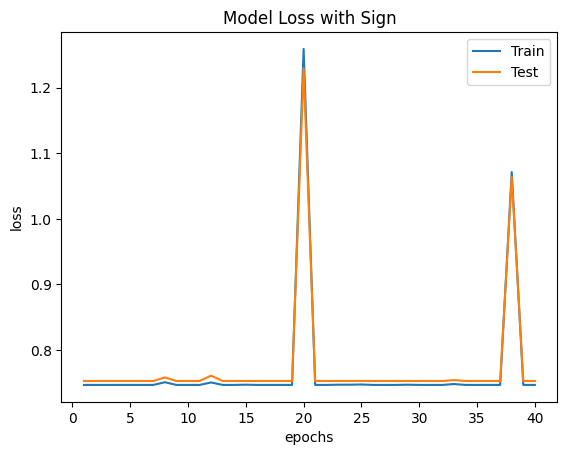

In [43]:
plt.plot(list(range(1,epochs+1)),loss_train,label="Train")
plt.plot(list(range(1,epochs+1)),loss_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Model Loss with Sign")
plt.legend()
plt.show()


Text(0.5, 1.0, 'Confusion Matric with Sign')

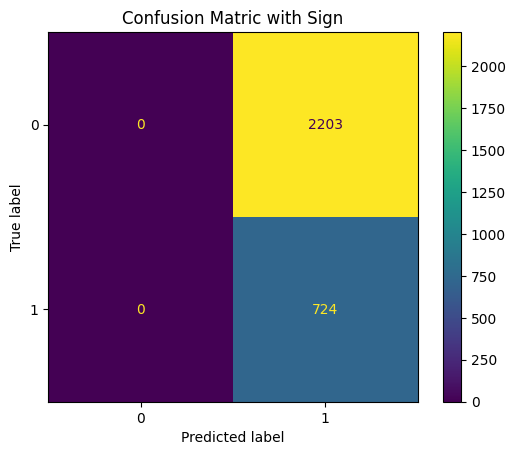

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"sign")
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('Confusion Matric with Sign')

## piece-wise-linear

In [4]:
acc_train=[]
acc_test=[]
loss_train=[]
loss_test=[]
epochs=40
per= Perceptron(24,0.001)
for epoch in tqdm(range(epochs)):
    for x_train, y_train in zip(X_train, Y_train):
        y_pred = per.forward(x=x_train,activation_func="piece-wise-linear")
        dW, db = per.back_propagation(x_train, y_train, y_pred)
        per.update(dW, db)
    losstrain,acctrain=per.evaluate( X_train, Y_train,"piece-wise-linear")
    losstest,acctest=per.evaluate( X_test, Y_test,"piece-wise-linear")
    acc_train.append(acctrain)
    acc_test.append(acctest)
    loss_train.append(losstrain)
    loss_test.append(losstest)

  0%|          | 0/40 [00:00<?, ?it/s]


NameError: name 'X_train' is not defined

In [ ]:
plt.plot(list(range(1,epochs+1)),acc_train,label="Train")
plt.plot(list(range(1,epochs+1)),acc_test,label="Test")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title("Model Accuracy with piece-wise-linear")
plt.legend()
plt.show()

In [ ]:
plt.plot(list(range(1,epochs+1)),loss_train,label="train")
plt.plot(list(range(1,epochs+1)),loss_test,label="test")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("model loss with piece-wise-linear")
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Y_pred=per.predict(X_test,"piece-wise-linear")
Y_pred=np.where(Y_pred<0.5,0,1)
cm =confusion_matrix(Y_test, Y_pred,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])

disp.plot()
disp.ax_.set_title('confusion matric with piece-wise-linear')